# Basic Exercises
## 1. Basic Classification Methods
### Exercise 1: Implementing Basic Classification Algorithms
* Objective: Get familiar with basic classification techniques using Scikit-learn.
* Tasks:
Load a simple dataset (e.g., Iris or Wine dataset).
Implement a basic classification algorithm (e.g., Logistic Regression or K-Nearest Neighbors).
Train the model and evaluate its accuracy using a test set.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}")

Logistic Regression Accuracy: 1.0000
K-Nearest Neighbors Accuracy: 1.0000


### Exercise 2: Confusion Matrix and Classification Report
* Objective: Understand model evaluation metrics.
* Tasks:
Use the trained model to make predictions on the test set.
Generate a confusion matrix and classification report using Scikit-learn.
Discuss the results, focusing on precision, recall, and F1-score.

In [2]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix and Classification Report for Logistic Regression
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix and Classification Report for K-Nearest Neighbors
print("K-Nearest Neighbors Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

Logistic Regression Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

K-Nearest Neighbors Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 2. Clustering Techniques
### Exercise 3: Implementing K-Means Clustering
* Objective: Apply K-Means clustering to a dataset.
* Tasks:
1) Load a dataset (e.g., customer data or a toy dataset).
2) Use K-Means to group the data into clusters.
3) Visualize the clusters using a scatter plot.

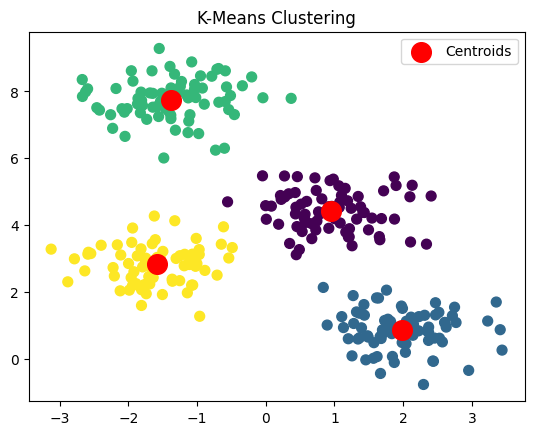

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data for clustering
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

### Exercise 4: Evaluating K-Means Clustering
* Objective: Evaluate the quality of clustering results.
* Tasks:
1) Calculate the inertia (sum of squared distances of samples to their closest cluster center).
2) Experiment with different numbers of clusters and plot the inertia to find the optimal number of clusters (Elbow Method).
3) Discuss the results.

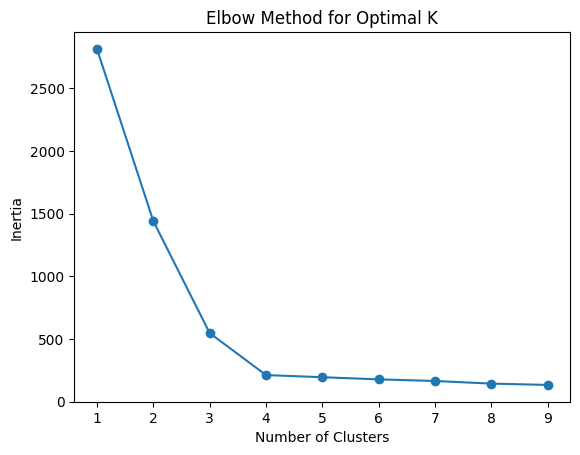

In [4]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

## 3. Introduction to Advanced Clustering Techniques
### Exercise 5: Implementing Hierarchical Clustering
* Objective: Explore hierarchical clustering.
* Tasks:
1) Apply Agglomerative Clustering to the same dataset used in K-Means.
2) Visualize the results using a dendrogram to illustrate the clustering hierarchy.
3) Compare the results with those from K-Means.

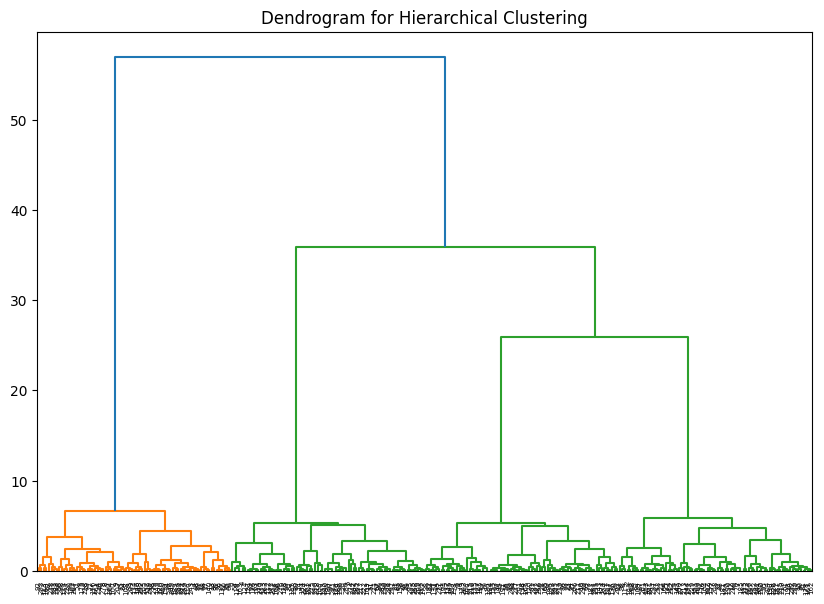

In [5]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hierarchical = hierarchical.fit_predict(X)

# Dendrogram
plt.figure(figsize=(10, 7))
linkage_matrix = linkage(X, 'ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

### Exercise 6: Introduction to DBSCAN
Objective: Understand density-based clustering.
Tasks:
Implement DBSCAN on the dataset and visualize the clusters.
Discuss the parameters (eps and min_samples) and their effect on clustering results.
Compare the performance of DBSCAN with K-Means.

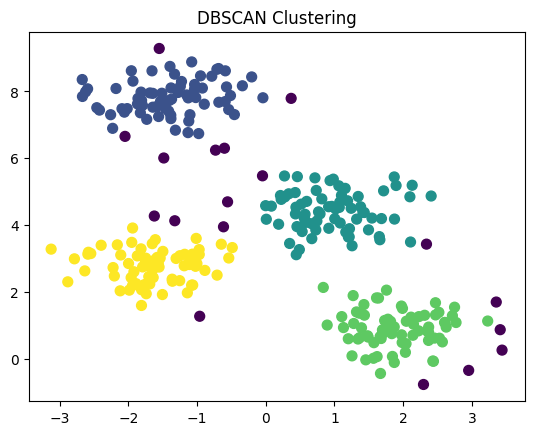

In [6]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Plot DBSCAN Clustering results
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()